In [1]:
library(readr)
library(dplyr)
library(tidyr)
library(stats)
library(dplyr)
library(knitr)
library(stringr) # For string operations
# For Tukey's HSD test
library(multcomp)
library(ggplot2)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: mvtnorm

Loading required package: survival



Loading required package: TH.data

Loading required package: MASS


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select



Attaching package: 'TH.data'


The following object is masked from 'package:MASS':

    geyser




In [2]:
# Load the CSV file
survey_data <- read.csv("../data/raw/2023-04-18_text_PSYC421-Single-Use-Cup.csv", stringsAsFactors = FALSE)

# View the first few rows of the data frame
head(survey_data)

,StartDate,EndDate,Status,IPAddress,Progress,Duration..in.seconds.,Finished,RecordedDate,ResponseId,RecipientLastName,...,Q3.2,Q4.2,Q5,Q5_5_TEXT,Q6,Q6_5_TEXT,Q7,Q8,Q8_4_TEXT,ConditionAssigned
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,How likely are you to reduce using single use cups?,How likely are you to bring your own reusable cup when purchasing beverages?,What is your status at UBC? - Selected Choice,What is your status at UBC? - Other (please specify) - Text,What is your gender identity? - Selected Choice,What is your gender identity? - Other (please specify) - Text,What is your age? (in number of years),What factor(s) would most likely reduce your consumption of single-use cups? (Choose all applicable answers) - Selected Choice,What factor(s) would most likely reduce your consumption of single-use cups? (Choose all applicable answers) - Other (Specify) - Text,ConditionAssigned
2,"{""ImportId"":""startDate"",""timeZone"":""America/Denver""}","{""ImportId"":""endDate"",""timeZone"":""America/Denver""}","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America/Denver""}","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID52""}","{""ImportId"":""QID53""}","{""ImportId"":""QID22""}","{""ImportId"":""QID22_5_TEXT""}","{""ImportId"":""QID24""}","{""ImportId"":""QID24_5_TEXT""}","{""ImportId"":""QID23_TEXT""}","{""ImportId"":""QID32""}","{""ImportId"":""QID32_4_TEXT""}","{""ImportId"":""ConditionAssigned""}"
3,2024-03-06 14:25:55,2024-03-06 14:27:13,IP Address,206.12.179.98,100,77,True,2024-03-06 14:27:13,R_7P4M3QNUV0sz7kl,,...,,,Students,,Woman,,21,"Learning about the environmental consequences associated with single-use cups (i.e,. pollution, cups used per day),Preferences for alternatives of single-use cup (i.e., I prefer to use my own mug)",,Loss
4,2024-03-06 14:36:46,2024-03-06 14:37:20,IP Address,24.84.220.242,100,34,True,2024-03-06 14:37:21,R_3uPoKeQUqogIL4l,,...,,,Not Affiliated,,Man,,21,"Learning about the financial implications of using single-use cups (i.e., cost per cup)",,Gain
5,2024-03-06 15:59:14,2024-03-06 16:00:22,IP Address,108.180.201.174,100,68,True,2024-03-06 16:00:23,R_65G7BrispC2eV2n,,...,Slightly unlikely,Slightly unlikely,Students,,Woman,,22,"Learning about the financial implications of using single-use cups (i.e., cost per cup),Preferences for alternatives of single-use cup (i.e., I prefer to use my own mug)",,Control
6,2024-03-06 17:01:22,2024-03-06 17:04:00,IP Address,49.36.185.105,100,158,True,2024-03-06 17:04:01,R_40i6X1z7fQUH2Bs,,...,,,Not Affiliated,,Woman,,,"Preferences for alternatives of single-use cup (i.e., I prefer to use my own mug)",,Loss


In [3]:
# Get the columns in the survey
column_names <- names(survey_data)
column_names


[1] "StartDate"             "EndDate"               "Status"               
 [4] "IPAddress"             "Progress"              "Duration..in.seconds."
 [7] "Finished"              "RecordedDate"          "ResponseId"           
[10] "RecipientLastName"     "RecipientFirstName"    "RecipientEmail"       
[13] "ExternalReference"     "LocationLatitude"      "LocationLongitude"    
[16] "DistributionChannel"   "UserLanguage"          "Consent.Form"         
[19] "Q2"                    "Q3"                    "Q4"                   
[22] "Q2.1"                  "Q3.1"                  "Q4.1"                 
[25] "Q2.2"                  "Q3.2"                  "Q4.2"                 
[28] "Q5"                    "Q5_5_TEXT"             "Q6"                   
[31] "Q6_5_TEXT"             "Q7"                    "Q8"                   
[34] "Q8_4_TEXT"             "ConditionAssigned"

In [4]:
filter_df <- dplyr::select(survey_data, 
  `Duration..in.seconds.`, `Finished`, `ResponseId`, 
  `Q2`, `Q3`, `Q4`, 
  `Q2.1`, `Q3.1`, `Q4.1`, 
  `Q2.2`, `Q3.2`, `Q4.2`, 
  `Q5`, `Q5_5_TEXT`, `Q6`, `Q6_5_TEXT`, `Q7`, `Q8`, `Q8_4_TEXT`, 
  `ConditionAssigned`
)


In [5]:
# Remove the second row as this additional data is not needed
df_cleaned <- filter_df[-2, ]
# View the first few rows to confirm removal
head(df_cleaned)

,Duration..in.seconds.,Finished,ResponseId,Q2,Q3,Q4,Q2.1,Q3.1,Q4.1,Q2.2,Q3.2,Q4.2,Q5,Q5_5_TEXT,Q6,Q6_5_TEXT,Q7,Q8,Q8_4_TEXT,ConditionAssigned
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Duration (in seconds),Finished,Response ID,How surprising was the above information?,How likely are you to reduce using single use cups?,How likely are you to bring your own reusable cup when purchasing beverages?,How surprising was the above information?,How likely are you to reduce using single use cups?,How likely are you to bring your own reusable cup when purchasing beverages?,How surprising was the above information?,How likely are you to reduce using single use cups?,How likely are you to bring your own reusable cup when purchasing beverages?,What is your status at UBC? - Selected Choice,What is your status at UBC? - Other (please specify) - Text,What is your gender identity? - Selected Choice,What is your gender identity? - Other (please specify) - Text,What is your age? (in number of years),What factor(s) would most likely reduce your consumption of single-use cups? (Choose all applicable answers) - Selected Choice,What factor(s) would most likely reduce your consumption of single-use cups? (Choose all applicable answers) - Other (Specify) - Text,ConditionAssigned
3,77,True,R_7P4M3QNUV0sz7kl,,,,Extremely unsurprising,Slightly unlikely,Slightly likely,,,,Students,,Woman,,21,"Learning about the environmental consequences associated with single-use cups (i.e,. pollution, cups used per day),Preferences for alternatives of single-use cup (i.e., I prefer to use my own mug)",,Loss
4,34,True,R_3uPoKeQUqogIL4l,Slightly surprising,Moderately unlikely,Moderately unlikely,,,,,,,Not Affiliated,,Man,,21,"Learning about the financial implications of using single-use cups (i.e., cost per cup)",,Gain
5,68,True,R_65G7BrispC2eV2n,,,,,,,Slightly surprising,Slightly unlikely,Slightly unlikely,Students,,Woman,,22,"Learning about the financial implications of using single-use cups (i.e., cost per cup),Preferences for alternatives of single-use cup (i.e., I prefer to use my own mug)",,Control
6,158,True,R_40i6X1z7fQUH2Bs,,,,Moderately unsurprising,Moderately likely,Slightly likely,,,,Not Affiliated,,Woman,,,"Preferences for alternatives of single-use cup (i.e., I prefer to use my own mug)",,Loss
7,91,True,R_1k0T1HeuJsmtdQm,Slightly surprising,Slightly unlikely,Slightly unlikely,,,,,,,Students,,Man,,21,"Learning about the financial implications of using single-use cups (i.e., cost per cup)",,Gain


In [6]:
# Specify the path and filename and add to processed data
output_path <- "../data/processed/df_cleaned_text.csv"

# Write the dataframe to a CSV file
write.csv(df_cleaned, output_path, row.names = FALSE)


In [7]:
q5_counts <- df_cleaned %>%
  filter(Q5 != "", Q5 != "What is your status at UBC? - Selected Choice") %>%
  count(Q5, name = "Count") %>%
  arrange(desc(Count))

What is your status at UBC?

|Status                 | Count|
|:----------------------|-----:|
|Students               |   121|
|Not Affiliated         |    21|
|Other (please specify) |     6|
|Staff                  |     2|
|Faculty Member         |     1|

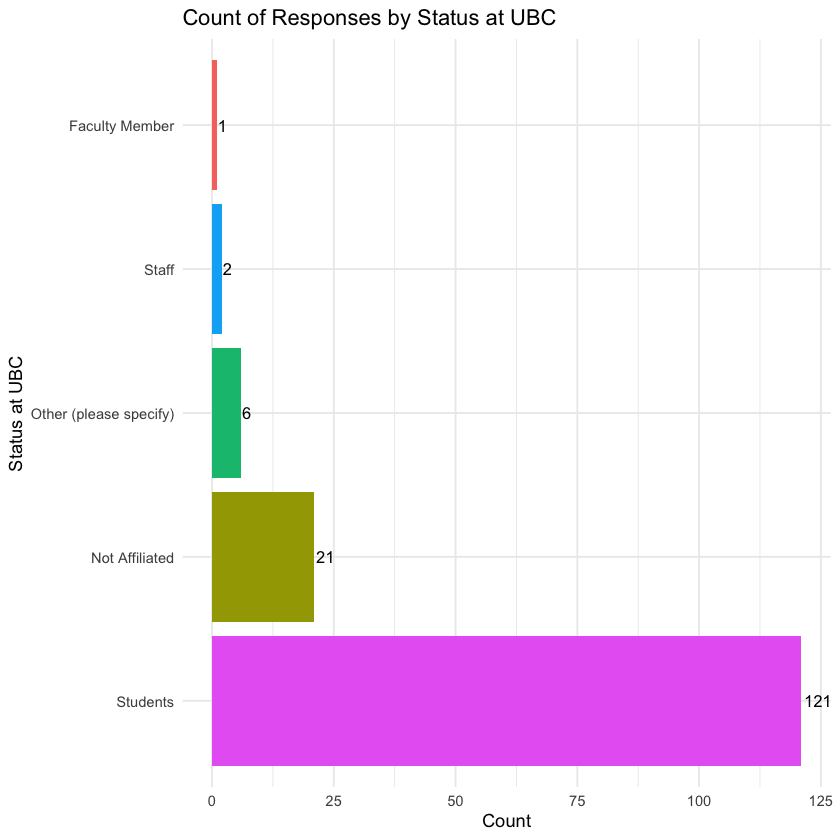

In [8]:
plot = ggplot(q5_counts, aes(x = reorder(Q5, -Count), y = Count, fill = Q5)) +
    geom_col() +
    coord_flip() + # Flip coordinates for horizontal bars
    labs(title = "Count of Responses by Status at UBC",
        x = "Status at UBC",
        y = "Count") +
    theme_minimal() +
    theme(legend.title = element_blank(), # Remove legend title
        legend.position = "none") # Remove legend if not needed
plot + geom_text(aes(label = Count), position = position_dodge(width = 0.9), hjust = -0.1, size = 3.5)

In [9]:
q8_counts_ordered <- df_cleaned %>%
  count(Q8, name = "Count") %>%
  arrange(desc(Count)) # Use arrange(Count) for ascending order

In [10]:
q8_counts_ordered <- df_cleaned %>%
  # Remove rows where Q8 is empty or has a placeholder text
  filter(Q8 != "", Q8 != "What factor(s) would most likely reduce your consumption of single-use cups? (Choose all applicable answers) - Selected Choice") %>%
  count(Q8, name = "Count") %>%
  arrange(desc(Count)) # Use arrange(Count) for ascending order


What factor(s) would most likely reduce your consumption of single-use cups? (Choose all applicable answers)
|Question                                                                                                                                                                                                                                                                                                           | Count|
|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----:|
|Learning about the environmental consequences associated with single-use cups (i.e,. pollution, cups used per day),Learning about the financial implications of using single-use cups (i.e., cost per cup)                                                                                                   |    27|
|Learning about the environmental consequences associated with single-use cups (i.e,. pollution, cups used per day),Learning about the financial implications of using single-use cups (i.e., cost per cup),Preferences for alternatives of single-use cup (i.e., I prefer to use my own mug)                 |    25|
|Preferences for alternatives of single-use cup (i.e., I prefer to use my own mug)                                                                                                                                                                                                                            |    22|
|Learning about the environmental consequences associated with single-use cups (i.e,. pollution, cups used per day)                                                                                                                                                                                           |    20|
|Learning about the financial implications of using single-use cups (i.e., cost per cup)                                                                                                                                                                                                                      |    20|
|Other (Specify)                                                                                                                                                                                                                                                                                              |    13|
|Learning about the financial implications of using single-use cups (i.e., cost per cup),Preferences for alternatives of single-use cup (i.e., I prefer to use my own mug)                                                                                                                                    |    10|
|Learning about the environmental consequences associated with single-use cups (i.e,. pollution, cups used per day),Preferences for alternatives of single-use cup (i.e., I prefer to use my own mug)                                                                                                         |     8|
|Learning about the environmental consequences associated with single-use cups (i.e,. pollution, cups used per day),Learning about the financial implications of using single-use cups (i.e., cost per cup),Preferences for alternatives of single-use cup (i.e., I prefer to use my own mug),Other (Specify) |     2|
|Learning about the financial implications of using single-use cups (i.e., cost per cup),Other (Specify)                                                                                                                                                                                                      |     2|
|Learning about the environmental consequences associated with single-use cups (i.e,. pollution, cups used per day),Other (Specify)                                                                                                                                                                           |     1|
|Preferences for alternatives of single-use cup (i.e., I prefer to use my own mug),Other (Specify)                                                                                                                                                                                                            |     1|

In [11]:
individual_responses <- df_cleaned %>%
  # Separate multiple responses into individual rows
  separate_rows(Q8, sep = ",") %>%
  # Trim whitespace to ensure accurate matching
  mutate(Q8 = trimws(Q8))

# Create a new column to categorize responses based on keywords
categorized_responses <- individual_responses %>%
  mutate(Category = case_when(
    str_detect(Q8, "environmental consequences") ~ "Environmental Consequences",
    str_detect(Q8, "financial implications") ~ "Financial Implications",
    str_detect(Q8, "Preferences for alternatives") ~ "Preferences for Alternatives",
    str_detect(Q8, "Other") ~ "Other (Specify)",
    TRUE ~ "Other"
  )) %>%
  count(Category, name = "Count") %>%
  filter(Category != "Other") %>%
  arrange(desc(Count))

# To view the categorized and counted responses
print(categorized_responses)

# A tibble: 4 x 2
  Category                     Count
  <chr>                        <int>
1 Financial Implications          86
2 Environmental Consequences      83
3 Preferences for Alternatives    68
4 Other (Specify)                 19


Table: What factor(s) would most likely reduce your consumption of single-use cups?

|Category                                                   | Count|
|:----------------------------------------------------------|-----:|
|Financial Implications Associated with Single-Use Cups     |    86|
|Environmental Consequences Associated with Single-Use Cups |    83|
|Preferences for Alternatives of Single-Use Cups            |    68|
|Other (Specify)                                            |    19|


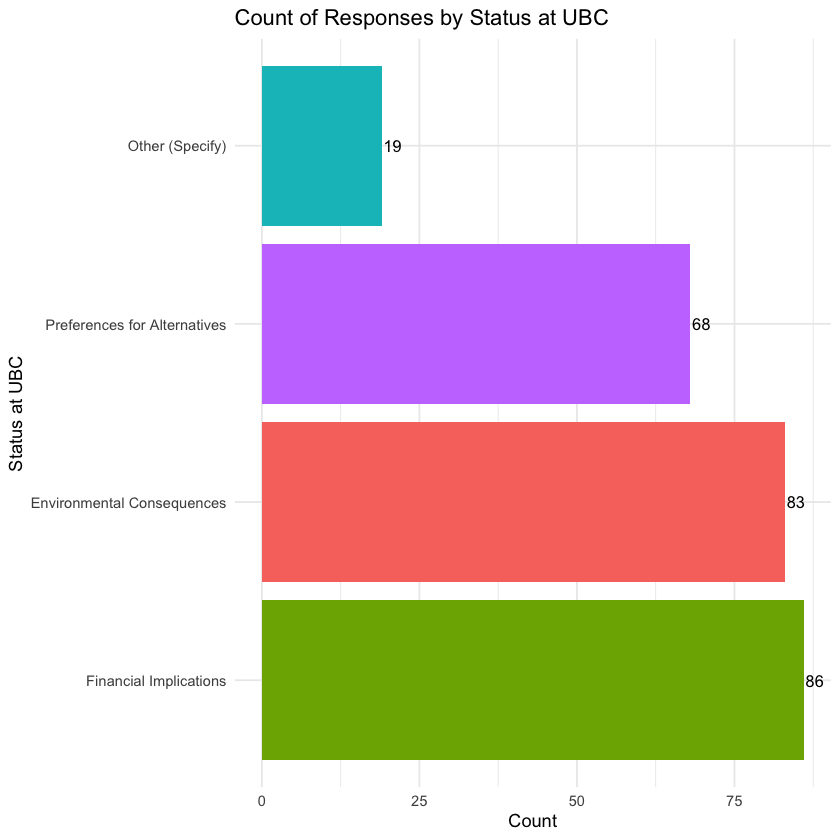

In [12]:
plot = ggplot(categorized_responses, aes(x = reorder(Category, -Count), y = Count, fill = Category)) +
    geom_col() +
    coord_flip() + # Flip coordinates for horizontal bars
    labs(title = "Count of Responses by Status at UBC",
        x = "Status at UBC",
        y = "Count") +
    theme_minimal() +
    theme(legend.title = element_blank(), # Remove legend title
        legend.position = "none") # Remove legend if not needed
plot + geom_text(aes(label = Count), position = position_dodge(width = 0.9), hjust = -0.1, size = 3.5)

In [13]:
# Load the CSV file
survey_data_numeric <- read.csv("../data/raw/2023-04-18_numerical_PSYC421-Single-Use-Cup.csv", stringsAsFactors = FALSE)

# View the first few rows of the data frame
head(survey_data_numeric)

,StartDate,EndDate,Status,IPAddress,Progress,Duration..in.seconds.,Finished,RecordedDate,ResponseId,RecipientLastName,...,Q3.2,Q4.2,Q5,Q5_5_TEXT,Q6,Q6_5_TEXT,Q7,Q8,Q8_4_TEXT,ConditionAssigned
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,How likely are you to reduce using single use cups?,How likely are you to bring your own reusable cup when purchasing beverages?,What is your status at UBC? - Selected Choice,What is your status at UBC? - Other (please specify) - Text,What is your gender identity? - Selected Choice,What is your gender identity? - Other (please specify) - Text,What is your age? (in number of years),What factor(s) would most likely reduce your consumption of single-use cups? (Choose all applicable answers) - Selected Choice,What factor(s) would most likely reduce your consumption of single-use cups? (Choose all applicable answers) - Other (Specify) - Text,ConditionAssigned
2,"{""ImportId"":""startDate"",""timeZone"":""America/Denver""}","{""ImportId"":""endDate"",""timeZone"":""America/Denver""}","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America/Denver""}","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID52""}","{""ImportId"":""QID53""}","{""ImportId"":""QID22""}","{""ImportId"":""QID22_5_TEXT""}","{""ImportId"":""QID24""}","{""ImportId"":""QID24_5_TEXT""}","{""ImportId"":""QID23_TEXT""}","{""ImportId"":""QID32""}","{""ImportId"":""QID32_4_TEXT""}","{""ImportId"":""ConditionAssigned""}"
3,2024-03-06 14:25:55,2024-03-06 14:27:13,0,206.12.179.98,100,77,1,2024-03-06 14:27:13,R_7P4M3QNUV0sz7kl,,...,,,1,,2,,21,"1,3",,Loss
4,2024-03-06 14:36:46,2024-03-06 14:37:20,0,24.84.220.242,100,34,1,2024-03-06 14:37:21,R_3uPoKeQUqogIL4l,,...,,,4,,1,,21,2,,Gain
5,2024-03-06 15:59:14,2024-03-06 16:00:22,0,108.180.201.174,100,68,1,2024-03-06 16:00:23,R_65G7BrispC2eV2n,,...,3,3,1,,2,,22,"2,3",,Control
6,2024-03-06 17:01:22,2024-03-06 17:04:00,0,49.36.185.105,100,158,1,2024-03-06 17:04:01,R_40i6X1z7fQUH2Bs,,...,,,4,,2,,,3,,Loss


In [14]:
# keep only selected columns for analysis

filter_df_numerical <- dplyr::select(survey_data_numeric, 
  `Duration..in.seconds.`, `Finished`, `ResponseId`, 
  `Q2`, `Q3`, `Q4`, 
  `Q2.1`, `Q3.1`, `Q4.1`, 
  `Q2.2`, `Q3.2`, `Q4.2`, 
  `Q5`, `Q5_5_TEXT`, `Q6`, `Q6_5_TEXT`, `Q7`, `Q8`, `Q8_4_TEXT`, 
  `ConditionAssigned`
)
# View the first few rows of the modified dataframe
head(filter_df_numerical)


,Duration..in.seconds.,Finished,ResponseId,Q2,Q3,Q4,Q2.1,Q3.1,Q4.1,Q2.2,Q3.2,Q4.2,Q5,Q5_5_TEXT,Q6,Q6_5_TEXT,Q7,Q8,Q8_4_TEXT,ConditionAssigned
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Duration (in seconds),Finished,Response ID,How surprising was the above information?,How likely are you to reduce using single use cups?,How likely are you to bring your own reusable cup when purchasing beverages?,How surprising was the above information?,How likely are you to reduce using single use cups?,How likely are you to bring your own reusable cup when purchasing beverages?,How surprising was the above information?,How likely are you to reduce using single use cups?,How likely are you to bring your own reusable cup when purchasing beverages?,What is your status at UBC? - Selected Choice,What is your status at UBC? - Other (please specify) - Text,What is your gender identity? - Selected Choice,What is your gender identity? - Other (please specify) - Text,What is your age? (in number of years),What factor(s) would most likely reduce your consumption of single-use cups? (Choose all applicable answers) - Selected Choice,What factor(s) would most likely reduce your consumption of single-use cups? (Choose all applicable answers) - Other (Specify) - Text,ConditionAssigned
2,"{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""_recordId""}","{""ImportId"":""QID31""}","{""ImportId"":""QID39""}","{""ImportId"":""QID29""}","{""ImportId"":""QID48""}","{""ImportId"":""QID50""}","{""ImportId"":""QID51""}","{""ImportId"":""QID49""}","{""ImportId"":""QID52""}","{""ImportId"":""QID53""}","{""ImportId"":""QID22""}","{""ImportId"":""QID22_5_TEXT""}","{""ImportId"":""QID24""}","{""ImportId"":""QID24_5_TEXT""}","{""ImportId"":""QID23_TEXT""}","{""ImportId"":""QID32""}","{""ImportId"":""QID32_4_TEXT""}","{""ImportId"":""ConditionAssigned""}"
3,77,1,R_7P4M3QNUV0sz7kl,,,,1,3,5,,,,1,,2,,21,"1,3",,Loss
4,34,1,R_3uPoKeQUqogIL4l,5,2,2,,,,,,,4,,1,,21,2,,Gain
5,68,1,R_65G7BrispC2eV2n,,,,,,,5,3,3,1,,2,,22,"2,3",,Control
6,158,1,R_40i6X1z7fQUH2Bs,,,,2,6,5,,,,4,,2,,,3,,Loss


In [15]:
# Remove the second row as this additional data is not needed
df_cleaned_numerical <- filter_df_numerical[-2, ]

# View the first few rows to confirm removal
head(df_cleaned_numerical)

,Duration..in.seconds.,Finished,ResponseId,Q2,Q3,Q4,Q2.1,Q3.1,Q4.1,Q2.2,Q3.2,Q4.2,Q5,Q5_5_TEXT,Q6,Q6_5_TEXT,Q7,Q8,Q8_4_TEXT,ConditionAssigned
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Duration (in seconds),Finished,Response ID,How surprising was the above information?,How likely are you to reduce using single use cups?,How likely are you to bring your own reusable cup when purchasing beverages?,How surprising was the above information?,How likely are you to reduce using single use cups?,How likely are you to bring your own reusable cup when purchasing beverages?,How surprising was the above information?,How likely are you to reduce using single use cups?,How likely are you to bring your own reusable cup when purchasing beverages?,What is your status at UBC? - Selected Choice,What is your status at UBC? - Other (please specify) - Text,What is your gender identity? - Selected Choice,What is your gender identity? - Other (please specify) - Text,What is your age? (in number of years),What factor(s) would most likely reduce your consumption of single-use cups? (Choose all applicable answers) - Selected Choice,What factor(s) would most likely reduce your consumption of single-use cups? (Choose all applicable answers) - Other (Specify) - Text,ConditionAssigned
3,77,1,R_7P4M3QNUV0sz7kl,,,,1,3,5,,,,1,,2,,21,"1,3",,Loss
4,34,1,R_3uPoKeQUqogIL4l,5,2,2,,,,,,,4,,1,,21,2,,Gain
5,68,1,R_65G7BrispC2eV2n,,,,,,,5,3,3,1,,2,,22,"2,3",,Control
6,158,1,R_40i6X1z7fQUH2Bs,,,,2,6,5,,,,4,,2,,,3,,Loss
7,91,1,R_1k0T1HeuJsmtdQm,5,3,3,,,,,,,1,,1,,21,2,,Gain


In [16]:
# Specify the path and filename and add to processed data
output_path <- "../data/processed/df_cleaned_numerical.csv"

# Write the dataframe to a CSV file
write.csv(df_cleaned_numerical, output_path, row.names = FALSE)


In [17]:
df_cleaned_numerical <- df_cleaned_numerical[-1, ]


In [18]:

# Convert Q2 Q3 and Q4 columns to numeric
df_cleaned_numerical$Q2 <- as.numeric(as.character(df_cleaned_numerical$Q2))
df_cleaned_numerical$`Q2.1` <- as.numeric(as.character(df_cleaned_numerical$`Q2.1`))
df_cleaned_numerical$`Q2.2` <- as.numeric(as.character(df_cleaned_numerical$`Q2.2`))

df_cleaned_numerical$Q3 <- as.numeric(as.character(df_cleaned_numerical$Q3))
df_cleaned_numerical$`Q3.1` <- as.numeric(as.character(df_cleaned_numerical$`Q3.1`))
df_cleaned_numerical$`Q3.2` <- as.numeric(as.character(df_cleaned_numerical$`Q3.2`))

df_cleaned_numerical$Q4 <- as.numeric(as.character(df_cleaned_numerical$Q4))
df_cleaned_numerical$`Q4.1` <- as.numeric(as.character(df_cleaned_numerical$`Q4.1`))
df_cleaned_numerical$`Q4.2` <- as.numeric(as.character(df_cleaned_numerical$`Q4.2`))

# Create Q2_combined Q3_combined and Q4_combined columns
df_cleaned_numerical <- df_cleaned_numerical %>%
  mutate(
    Q2_combined = case_when(
      ConditionAssigned == "Gain" ~ Q2,
      ConditionAssigned == "Loss" ~ `Q2.1`,
      ConditionAssigned == "Control" ~ `Q2.2`,
      TRUE ~ NA_real_
    ),
    Q3_combined = case_when(
      ConditionAssigned == "Gain" ~ Q3,
      ConditionAssigned == "Loss" ~ `Q3.1`,
      ConditionAssigned == "Control" ~ `Q3.2`,
      TRUE ~ NA_real_
    ),
    Q4_combined = case_when(
      ConditionAssigned == "Gain" ~ Q4,
      ConditionAssigned == "Loss" ~ `Q4.1`,
      ConditionAssigned == "Control" ~ `Q4.2`,
      TRUE ~ NA_real_
    )
  )

# Remove the original Q2 Q3 and Q4 columns
df_cleaned_numerical <- df_cleaned_numerical %>%
  dplyr::select(-Q2, -`Q2.1`, -`Q2.2`,-Q3, -`Q3.1`, -`Q3.2`, -Q4, -`Q4.1`, -`Q4.2`, everything())

# View the updated dataframe
head(df_cleaned_numerical)


,Duration..in.seconds.,Finished,ResponseId,Q5,Q5_5_TEXT,Q6,Q6_5_TEXT,Q7,Q8,Q8_4_TEXT,...,Q4_combined,Q2,Q3,Q4,Q2.1,Q3.1,Q4.1,Q2.2,Q3.2,Q4.2
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,77,1,R_7P4M3QNUV0sz7kl,1,,2,,21,"1,3",,...,5,NA,NA,NA,1,3,5,NA,NA,NA
4,34,1,R_3uPoKeQUqogIL4l,4,,1,,21,2,,...,2,5,2,2,NA,NA,NA,NA,NA,NA
5,68,1,R_65G7BrispC2eV2n,1,,2,,22,"2,3",,...,3,NA,NA,NA,NA,NA,NA,5,3,3
6,158,1,R_40i6X1z7fQUH2Bs,4,,2,,,3,,...,5,NA,NA,NA,2,6,5,NA,NA,NA
7,91,1,R_1k0T1HeuJsmtdQm,1,,1,,21,2,,...,3,5,3,3,NA,NA,NA,NA,NA,NA
8,103,1,R_3y9bl3tR1vzxcSR,1,,2,,22,"1,2",,...,6,NA,NA,NA,2,7,6,NA,NA,NA


In [19]:
names(df_cleaned_numerical)

[1] "Duration..in.seconds." "Finished"              "ResponseId"           
 [4] "Q5"                    "Q5_5_TEXT"             "Q6"                   
 [7] "Q6_5_TEXT"             "Q7"                    "Q8"                   
[10] "Q8_4_TEXT"             "ConditionAssigned"     "Q2_combined"          
[13] "Q3_combined"           "Q4_combined"           "Q2"                   
[16] "Q3"                    "Q4"                    "Q2.1"                 
[19] "Q3.1"                  "Q4.1"                  "Q2.2"                 
[22] "Q3.2"                  "Q4.2"

In [20]:
df_cleaned_numerical_final <- dplyr::select(df_cleaned_numerical, 
  `ResponseId`, 
  `ConditionAssigned`,
  `Q2_combined`,`Q3_combined`, `Q4_combined`
)
df_cleaned_numerical_final

,ResponseId,ConditionAssigned,Q2_combined,Q3_combined,Q4_combined
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
3,R_7P4M3QNUV0sz7kl,Loss,1,3,5
4,R_3uPoKeQUqogIL4l,Gain,5,2,2
5,R_65G7BrispC2eV2n,Control,5,3,3
6,R_40i6X1z7fQUH2Bs,Loss,2,6,5
7,R_1k0T1HeuJsmtdQm,Gain,5,3,3
8,R_3y9bl3tR1vzxcSR,Loss,2,7,6
9,R_7jx25gH6q84XuJX,Control,1,5,4
10,R_1F5my25GorP5SB7,Control,1,3,3
11,R_4rrxy04vs26yGbE,Gain,5,5,3


In [21]:
count_by_condition <- df_cleaned_numerical %>%
  group_by(ConditionAssigned) %>%
  summarise(Count = n())

# To view the count for each ConditionAssigned
print(count_by_condition)


# A tibble: 4 x 2
  ConditionAssigned Count
  <chr>             <int>
1 ""                    4
2 "Control"            51
3 "Gain"               50
4 "Loss"               53


Table: Count by Condition Assigned

| ConditionAssigned | Count |
|-------------------|------:|
| Loss              |    53 |
| Control           |    51 |
| Gain              |    50 |

4 values unassigned (NaN)

In [22]:
# Specify the path and filename and add to processed data
output_path <- "../data/processed/numerical_final.csv"

# Write the dataframe to a CSV file
write.csv(df_cleaned_numerical_final, output_path, row.names = FALSE)

## Conducting Statistical Analysis for N=158 total with 4 missing values

## **Descriptive Statistics**

The table presents descriptive statistics for responses to three questions (`Q2_combined`, `Q3_combined`, `Q4_combined`) under three different conditions (`Control`, `Gain`, `Loss`). 

|ConditionAssigned |  Q2_mean| Q2_median| Q2_mode|    Q2_sd| Q2_variance|  Q3_mean| Q3_median| Q3_mode|    Q3_sd| Q3_variance|  Q4_mean| Q4_median| Q4_mode|    Q4_sd| Q4_variance|
|:-----------------|--------:|---------:|-------:|--------:|-----------:|--------:|---------:|-------:|--------:|-----------:|--------:|---------:|-------:|--------:|-----------:|
|Control           | 2.509804|       2.0|       1| 1.592137|    2.534902| 3.784314|         4|       5| 1.792358|    3.212549| 3.117647|         3|       1| 1.872400|    3.505882|
|Gain              | 3.604167|       3.5|       5| 1.954151|    3.818706| 3.978723|         4|       5| 1.905249|    3.629972| 3.270833|         3|       1| 1.818809|    3.308067|
|Loss              | 3.653846|       4.0|       2| 1.643581|    2.701357| 4.461538|         5|       6| 2.004520|    4.018099| 4.057692|         5|       5| 1.924185|    3.702489|

Here's a brief interpretation of what the data tells us:

### `Q2_combined` (How surprising was the information?)
- **Control**: Average surprise is moderately low (mean = 2.51), with the most frequent response being 1 (not surprising). The median response is 2, indicating a skew towards lower surprise in the control group. With an SD of 1.592 and variance of 2.534, responses exhibit moderate variability, mostly skewed towards not being surprised.
- **Gain**: Slightly higher average surprise (mean = 3.60) with a median of 3.5, suggesting a more uniform distribution of responses but still leaning towards the lower end. The mode is 5, indicating that the most common response is high surprise. The SD of 1.954 and variance of 3.819 indicate a wider range of reactions, from not surprised to highly surprised, with a tendency towards the latter.
- **Loss**: Similar to the Gain condition, with a slightly higher mean (3.65) and the median at 4. The mode is 2, suggesting that the most frequent individual response leans towards lower surprise, despite the higher overall average. Responses under the Loss condition show a spread (SD = 1.643, variance = 2.701) similar to Gain, suggesting varied levels of surprise but a higher average surprise overall.

### `Q3_combined` (Likelihood of reducing single-use cups)
- **Control**: Participants are somewhat likely to reduce use (mean = 3.78), with the median at 4 and the mode at 5, indicating a tendency towards agreeing with the likelihood of reducing use. An SD of 1.792 and variance of 3.213 reveal a spread in the likelihood of reducing cup use, with a trend towards likelihood.
- **Gain**: Slightly higher likelihood (mean = 3.98) with both median and mode at 4 and 5, respectively, suggesting a consistent agreement on the likelihood of reducing use. The SD of 1.905 and variance of 3.630 reflect a range of responses but generally show agreement towards reducing cup usage.
- **Loss**: Shows the highest likelihood (mean = 4.46) with the median at 5 and the mode at 6, indicating strong agreement towards reducing single-use cup consumption. Exhibiting the broadest spread of responses (SD = 2.004, variance = 4.018), indicating a strong but varied agreement towards reducing cup usage.

### `Q4_combined` (Likelihood of bringing own reusable cup)
- **Control**: Lower likelihood (mean = 3.12) with a median of 3 and a surprising mode of 1, indicating a significant number of participants are unlikely to bring their own cup despite the mean suggesting otherwise. The higher SD of 1.872 and variance of 3.506 suggest significant variability, with many leaning towards unlikely to bring their own cup.
- **Gain**: Similar to Control in mean (3.27) and median (3), but with a mode of 1, indicating some reluctance among participants in the Gain condition as well. Similarly, an SD of 1.819 and variance of 3.308 show varied responses with a notable portion showing reluctance.
- **Loss**: Higher likelihood (mean = 4.06) with a median of 5 and a mode of 5, showing a strong agreement among Loss condition participants to bring their own reusable cup. The SD of 1.924 and variance of 3.702 indicate a broad range of responses, yet with a consensus more strongly inclined towards bringing a reusable cup.

### Summary
- The `Loss` condition consistently shows a trend towards higher means in responses, indicating that framing the question in terms of loss (potential negative outcomes) may more strongly influence participants' attitudes towards reducing single-use cups and bringing their own reusable cups.
- Despite some variability in the modes, which could suggest individual response preferences or outliers, the median and mean values across the three questions suggest that how information is framed (`Control`, `Gain`, or `Loss`) can influence reported attitudes and intentions.
- The notable difference in modes for Q4_combined across conditions, especially the mode of 5 for `Loss`, underlines the importance of framing in encouraging pro-environmental behaviors.

In [23]:
# Helper function to calculate mode
calculate_mode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}

# Calculating descriptive statistics

descriptive_stats <- df_cleaned_numerical %>%
  filter(ConditionAssigned != "") %>% # Filtering out rows where ConditionAssigned is NA
  group_by(ConditionAssigned) %>%
  summarise(
    Q2_mean = mean(Q2_combined, na.rm = TRUE),
    Q2_median = median(Q2_combined, na.rm = TRUE),
    Q2_mode = calculate_mode(Q2_combined),
    Q2_sd = sd(Q2_combined, na.rm = TRUE), # Standard deviation for Q2
    Q2_variance = var(Q2_combined, na.rm = TRUE), # Variance for Q2
    Q3_mean = mean(Q3_combined, na.rm = TRUE),
    Q3_median = median(Q3_combined, na.rm = TRUE),
    Q3_mode = calculate_mode(Q3_combined),
    Q3_sd = sd(Q3_combined, na.rm = TRUE), # Standard deviation for Q3
    Q3_variance = var(Q3_combined, na.rm = TRUE), # Variance for Q3
    Q4_mean = mean(Q4_combined, na.rm = TRUE),
    Q4_median = median(Q4_combined, na.rm = TRUE),
    Q4_mode = calculate_mode(Q4_combined),
    Q4_sd = sd(Q4_combined, na.rm = TRUE), # Standard deviation for Q4
    Q4_variance = var(Q4_combined, na.rm = TRUE) # Variance for Q4
  )

# View the results
descriptive_stats


ConditionAssigned,Q2_mean,Q2_median,Q2_mode,Q2_sd,Q2_variance,Q3_mean,Q3_median,Q3_mode,Q3_sd,Q3_variance,Q4_mean,Q4_median,Q4_mode,Q4_sd,Q4_variance
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Control,2.509804,2.0,1,1.592138,2.534902,3.784314,4,5,1.792359,3.212549,3.117647,3,1,1.872400,3.505882
Gain,3.604167,3.5,5,1.954151,3.818706,3.978723,4,5,1.905249,3.629972,3.270833,3,1,1.818809,3.308067
Loss,3.653846,4.0,2,1.643581,2.701357,4.461538,5,6,2.004520,4.018100,4.057692,5,5,1.924185,3.702489


## **One-Way ANOVA**

#### ANOVA Summaries Interpretation

We conducted an ANOVA (Analysis of Variance) to examine if there were statistically significant differences between the means of `Q2`, `Q3`, and `Q4` scores across the different `ConditionAssigned` groups. Below is a summary of the findings from each ANOVA test:

### For `Q2`: How surprising was the above information?  

The ANOVA test for `Q2_combined` suggests that there is a statistically significant difference between the groups determined by `ConditionAssigned` (F(2, 148) = 7.074, p = 0.00116). The p-value is less than the conventional threshold of 0.05, which indicates that we can reject the null hypothesis of equal means across the conditions for this variable. This means that the `ConditionAssigned` factor does have an effect on the `Q2_combined` responses. Specifically, with a p-value of 0.00116, this effect is significant at the 0.01 level.

### For `Q3`: How likely are you to reduce using single use cups?

For `Q3_combined`, the ANOVA test did not find a statistically significant difference between the groups defined by `ConditionAssigned` (F(2, 147) = 1.727, p = 0.181). The p-value is greater than 0.05, leading us to fail to reject the null hypothesis. Therefore, we do not have sufficient evidence to conclude that there are differences in the means of `Q3_combined` across the different conditions.

### For `Q4`: How likely are you to bring your own reusable cup when purchasing beverages?

The ANOVA test for `Q4_combined` shows that there is a statistically significant difference between the groups as per `ConditionAssigned` (F(2, 148) = 3.722, p = 0.0265). The p-value is less than 0.05, which suggests that the means for `Q4_combined` are not equal across all conditions. The significance level for this result is at the 0.05 level but not at the more stringent 0.01 level.

**In conclusion, the ANOVA analysis indicates that the condition participants were assigned to had a significant impact on their responses to certain survey questions (`Q2` and `Q4`), while it did not significantly affect responses for `Q3`.**

---

It is important to note that while ANOVA tells us that there is a difference in means, it does not tell us which specific groups are different from each other. To determine this, a post hoc test such as Tukey's HSD (Honestly Significant Difference) would be conducted following a significant ANOVA result. Additionally, the statement "7 observations deleted due to missingness" and "8 observations deleted due to missingness" indicate that some data was not included in the analysis due to missing values. This should be considered when interpreting the results and should be acknowledged in your study limitations or discussion sections.

In [24]:
# For Q2_combined
aov_Q2 <- aov(Q2_combined ~ ConditionAssigned, data = df_cleaned_numerical)
summary(aov_Q2)

# For Q3_combined
aov_Q3 <- aov(Q3_combined ~ ConditionAssigned, data = df_cleaned_numerical)
summary(aov_Q3)

# For Q4_combined
aov_Q4 <- aov(Q4_combined ~ ConditionAssigned, data = df_cleaned_numerical)
summary(aov_Q4)


                   Df Sum Sq Mean Sq F value  Pr(>F)   
ConditionAssigned   2   42.4   21.22   7.074 0.00116 **
Residuals         148  444.0    3.00                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
7 observations deleted due to missingness

                   Df Sum Sq Mean Sq F value Pr(>F)
ConditionAssigned   2   12.5   6.255   1.727  0.181
Residuals         147  532.5   3.623               
8 observations deleted due to missingness

                   Df Sum Sq Mean Sq F value Pr(>F)  
ConditionAssigned   2   26.1  13.067   3.722 0.0265 *
Residuals         148  519.6   3.511                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
7 observations deleted due to missingness

## **Tukey's HSD Test**

### How surprising was the above information? 

The Tukey's Honest Significant Difference (HSD) test for `Q2_combined` yields the following insights regarding the impact of different conditions ("Gain", "Loss", and "Control") on participants' responses:

1. **Gain vs. Control**: Participants in the "Gain" condition scored on average 1.094 units higher than those in the "Control" group. This difference is statistically significant (p = 0.0057), indicating a reliable effect of the "Gain" condition on increasing scores.

2. **Loss vs. Control**: Participants in the "Loss" condition scored on average 1.144 units higher than the "Control" group. This difference is also statistically significant (p = 0.0029), suggesting the "Loss" condition effectively increased scores compared to the control.

3. **Loss vs. Gain**: The difference between the "Loss" and "Gain" groups is not statistically significant, with a mean difference of approximately 0.05 units (p = 0.9887). This implies that the influence of "Loss" and "Gain" conditions on `Q2_combined` scores is comparable.

### Summary:

The analysis indicates that both "Gain" and "Loss" conditions are associated with higher `Q2_combined` scores when compared to the "Control" condition, with both effects being statistically significant. There is no significant difference in scores between the "Gain" and "Loss" conditions, suggesting that the way the condition is framed (as a gain or a loss) does not significantly alter the impact on participants' responses in this context.

In [25]:
# Tukey HSD test for Q2_combined
tukey_Q2 <- TukeyHSD(aov(Q2_combined ~ ConditionAssigned, data = df_cleaned_numerical))
print(tukey_Q2)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Q2_combined ~ ConditionAssigned, data = df_cleaned_numerical)

$ConditionAssigned
                   diff        lwr       upr     p adj
Gain-Control 1.09436275  0.2697220 1.9190035 0.0057202
Loss-Control 1.14404223  0.3359057 1.9521788 0.0029149
Loss-Gain    0.04967949 -0.7711078 0.8704668 0.9887439



### How likely are you to reduce using single use cups?

The Tukey's Honest Significant Difference (HSD) test for `Q3_combined` offers a comparison of means across the "Gain", "Loss", and "Control" conditions, and here are the results:

1. **Gain vs. Control**: The mean score for the "Gain" condition is 0.194 units higher than for the "Control" group. However, this difference is not statistically significant (p = 0.8689), suggesting that the "Gain" framing does not significantly affect the `Q3_combined` scores compared to the control.

2. **Loss vs. Control**: Participants in the "Loss" condition have a mean score that is 0.677 units higher than those in the "Control" group. While this shows a greater difference than the "Gain" condition, it is still not statistically significant (p = 0.1713), indicating that the "Loss" condition does not lead to a significant change in `Q3_combined` scores compared to the control.

3. **Loss vs. Gain**: The comparison between "Loss" and "Gain" shows a mean difference of 0.483 units, with the "Loss" condition being higher. This difference is not statistically significant (p = 0.4199), implying that there is no significant difference in the `Q3_combined` scores between the "Loss" and "Gain" conditions.

### Summary:

The Tukey HSD test results for `Q3_combined` suggest there are no statistically significant differences between the "Control" condition and either the "Gain" or "Loss" conditions. Similarly, no significant difference is noted when comparing the "Gain" and "Loss" conditions directly. Essentially, the framing of the condition, whether as a gain or a loss, does not appear to have a significant effect on `Q3_combined` scores.

In [26]:
# Tukey HSD test for Q2_combined
tukey_Q3 <- TukeyHSD(aov(Q3_combined ~ ConditionAssigned, data = df_cleaned_numerical))
print(tukey_Q3)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Q3_combined ~ ConditionAssigned, data = df_cleaned_numerical)

$ConditionAssigned
                  diff        lwr      upr     p adj
Gain-Control 0.1944097 -0.7167984 1.105618 0.8689420
Loss-Control 0.6772247 -0.2108927 1.565342 0.1713452
Loss-Gain    0.4828151 -0.4241813 1.389811 0.4198802



### How likely are you to bring your own reusable cup when purchasing beverages?

The Tukey's Honest Significant Difference (HSD) test for `Q4_combined` yields insights into how different conditions—"Gain", "Loss", and "Control"—affect the outcomes. Here's a concise interpretation of the findings:

1. **Gain vs. Control**: The average score under the "Gain" condition exceeds that of the "Control" group by 0.153 units, though this difference doesn't reach statistical significance (p = 0.913). This indicates that introducing a "Gain" framework doesn't significantly alter `Q4_combined` scores compared to the control setting.

2. **Loss vs. Control**: Here, the "Loss" condition results in a mean score 0.940 units higher than the "Control", marking a statistically significant difference (p = 0.032). This suggests that the "Loss" framing can significantly impact `Q4_combined` scores, enhancing them in comparison to the baseline control condition.

3. **Loss vs. Gain**: The comparison reveals a difference of 0.787 units, with "Loss" scoring higher than "Gain". While not meeting the conventional threshold for statistical significance (p = 0.094), this outcome hints at a trend where "Loss" may exert a stronger influence on `Q4_combined` scores than "Gain", albeit not conclusively so.

### Summary:

For `Q4_combined` scores, only the difference between "Loss" and "Control" conditions is statistically significant, suggesting that framing an outcome as a loss might more effectively influence certain participant responses than a neutral or gain-oriented framing. The comparisons between "Gain" vs. "Control" and "Loss" vs. "Gain" do not show statistically significant differences, though the latter exhibits a suggestive trend that merits further exploration.

In [27]:
# Tukey HSD test for Q4_combined
tukey_Q4 <- TukeyHSD(aov(Q4_combined ~ ConditionAssigned, data = df_cleaned_numerical))
print(tukey_Q4)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Q4_combined ~ ConditionAssigned, data = df_cleaned_numerical)

$ConditionAssigned
                  diff         lwr      upr     p adj
Gain-Control 0.1531863 -0.73890883 1.045281 0.9129876
Loss-Control 0.9400452  0.06580435 1.814286 0.0318105
Loss-Gain    0.7868590 -0.10106744 1.674785 0.0937022



---